# *Brain tumor Image Classification*

1. Setup and load data

* *Importing needed libraries :*

# *Tumor Image Classification*

In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

* *Setting data Directory and determone the 4 tumor types :*

In [4]:
data_dir="DataSet"
os.listdir(data_dir)

['glioma', 'meningioma', 'notumor', 'pituitary']

In [5]:
# os.path.join(data_dir,"meningioma")

* *samlple data shape :*

In [6]:
img=cv2.imread(os.path.join("DataSet","meningioma","Tr-me_0010.jpg"))
img.shape

(512, 512, 3)

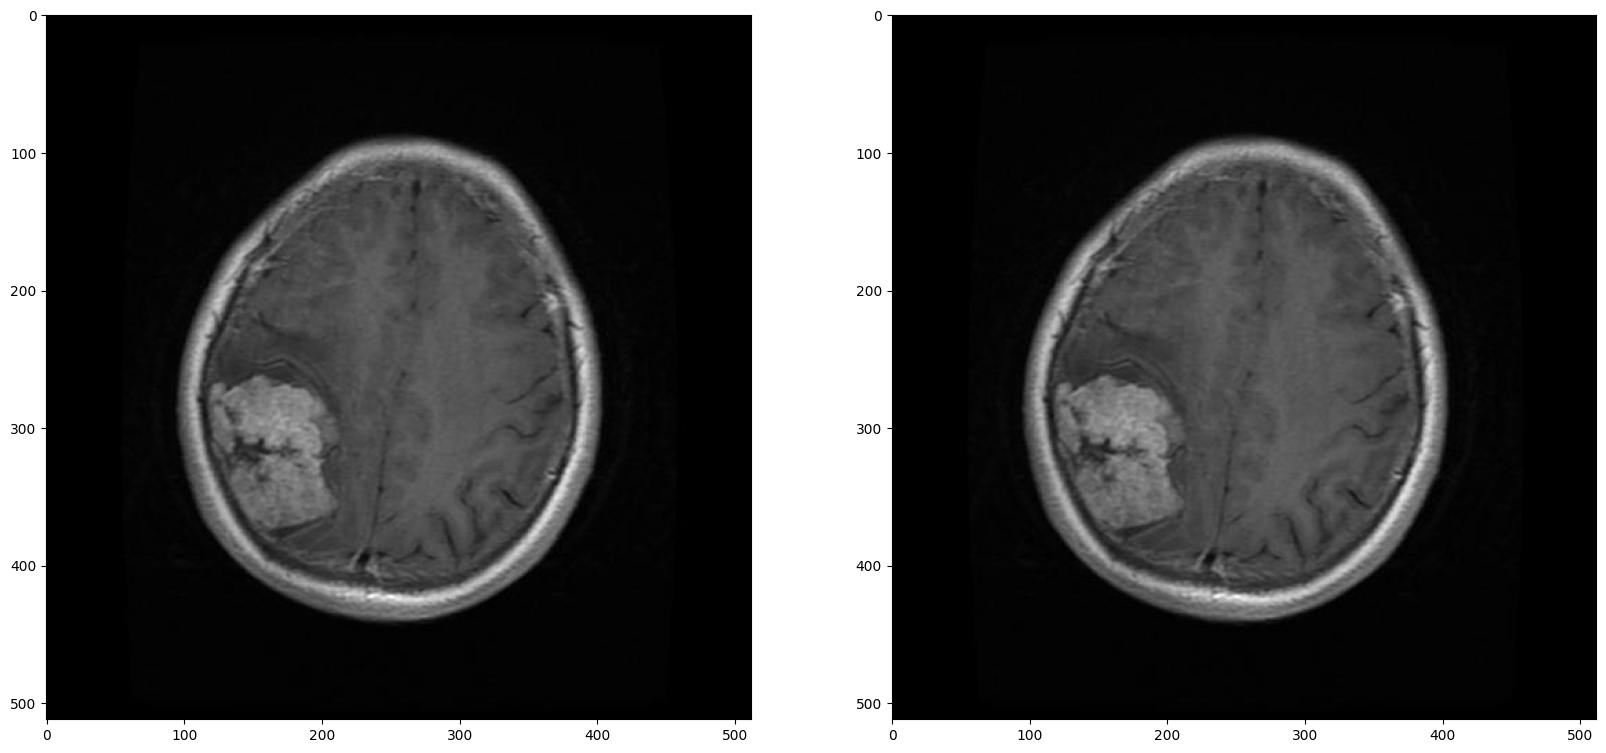

In [7]:
plt.subplot(1,2,1)
plt.imshow(img);

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [8]:
'''for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        imgae_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(imgae_path)
            tip=imghdr.what(imgae_path)
            if tip not in images_extension:
                #print("image not in extension list {}".format(imgae_path))
                os.remove(imgae_path)
        except Exception as e:
            pass#print("issue with image {}".format(imgae_path))'''
                    

'for image_class in os.listdir(data_dir):\n    for image in os.listdir(os.path.join(data_dir,image_class)):\n        imgae_path=os.path.join(data_dir,image_class,image)\n        try:\n            img=cv2.imread(imgae_path)\n            tip=imghdr.what(imgae_path)\n            if tip not in images_extension:\n                #print("image not in extension list {}".format(imgae_path))\n                os.remove(imgae_path)\n        except Exception as e:\n            pass#print("issue with image {}".format(imgae_path))'

* *Data loading*

In [9]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 5712 files belonging to 4 classes.


*The data has 5712 imges for 4 classes*

*This is not a data set that is pre_loaded into memory already,but it is a generater, so to access,see and grab the data , we will apply numpy_iterator fucntion*

In [10]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()


In [11]:
print(len(batch))
## the batch has 2 information (the image data, the image lable)

2


In [12]:
batch[0].shape #the batch size is 32  and the image shape (256,256,3)

(32, 256, 256, 3)

In [13]:
batch[1] ## we have 4 lables [0,1,2,3]

array([3, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 1, 3, 0, 2, 2, 3, 3, 2, 3, 1, 2,
       0, 3, 0, 3, 2, 0, 2, 2, 2, 0])

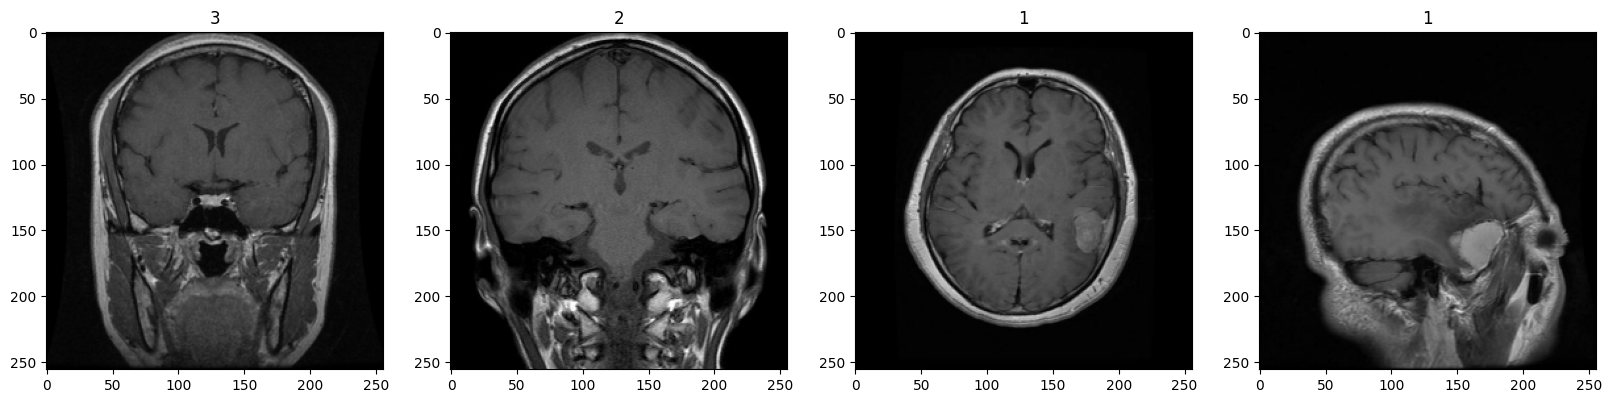

In [14]:
## Visualling the 1st 4 images
fig,ax=plt.subplots(ncols=4,figsize=(20,20))   
for index,img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

---

2. Preprocess Data

* *Data Scalling:*

In [15]:
data=data.map(lambda x, y :(x/255, y))

In [16]:
scalled_iterator=data.as_numpy_iterator()


In [17]:
batch=scalled_iterator.next()

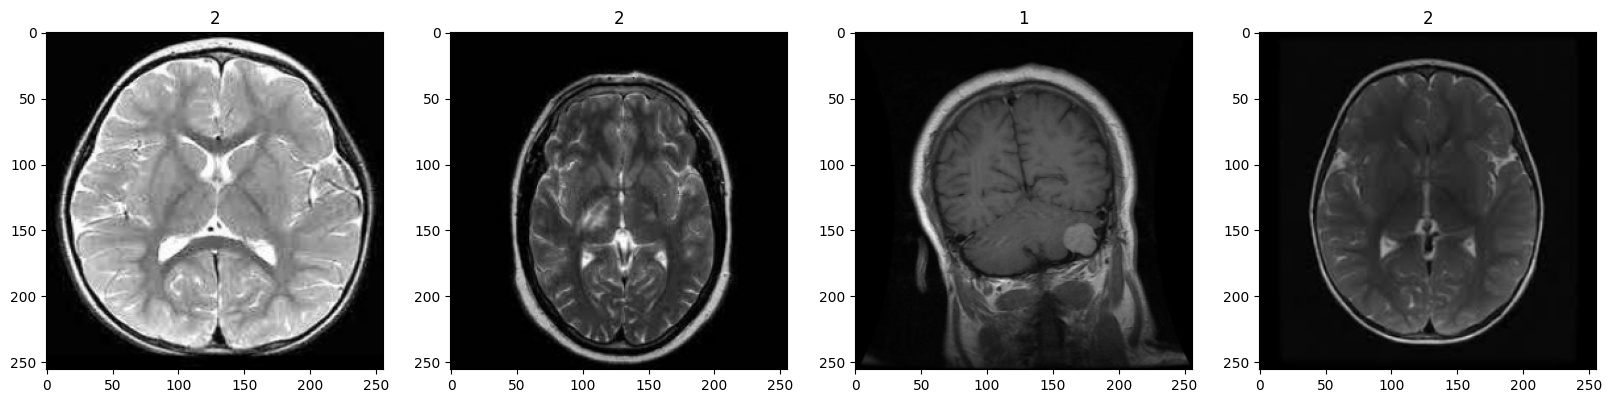

In [18]:
## Visualling the 1st 4 images after scalling 
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for index,img in enumerate(batch[0][:4]):
    ax[index].imshow(img)
    ax[index].title.set_text(batch[1][index])

* *Data Splitting :*

In [19]:
len(data)

179

In [20]:
train_data=int(len(data)*.7)            # 70% of data as trainning data
validation_data=int(len(data)*.2)+1    # 20% of data as validation data
test_data=int(len(data)*.1)+1          # 10% of data as test data

In [21]:
train_data+validation_data+test_data  # the length sum of all new data , should be as len(data)

179

* *we will use take and skip methods (from tensorflow) to detairmine how much data we will take from that particular partition*

In [22]:
train=data.take(train_data)
validation=data.skip(train_data).take(validation_data)
test=data.skip(train_data+validation_data).take(test_data)

In [23]:
len(train)+len(validation)+len(test)

179

---

3. Deep Learning:

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [26]:
model = Sequential()

In [27]:

model.add(Conv2D(16, (3, 3), 1,activation='relu', input_shape=(256, 256, 3)))   # layer 1: 16 filter each 3*3, one stride,relue activation fucnion :max(0,1)
model.add(MaxPooling2D())                                                       # applying maxpooling to exctract more information

model.add(Conv2D(32, (3, 3), 1,activation='relu'))                              # layer 2: 32 filter each 3*3, one stride,relue activation fucnion :max(0,1)
model.add(MaxPooling2D())                                                       # applying maxpooling to exctract more information

model.add(Conv2D(64, (3, 3), 1,activation='relu'))                              # layer 3: 16 filter each 3*3, one stride,relue activation fucnion :max(0,1)
model.add(MaxPooling2D())                                                       # applying maxpooling to exctract more information

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [29]:
model.add(Flatten())                   # flattening data 
model.add(Dense(256, activation='relu'))   ## ANN layer 
model.add(Dense(4, activation='sigmoid'))  ##final layer ,4 possible outcomes ,sigmoid activation fucntion 0,1

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [31]:
#apply adam optimizer which used in updating the weights in the backpropagation proccess,with categorical cross entropy loss function ,and accuract metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [32]:
# logdir="logs"
#TensorBoard_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
early_stopp=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=1,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [34]:
history = model.fit(train,validation_data=validation,epochs=10,callbacks=early_stopp)  # 10 epochs

Epoch 1/10


c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




125/125 [==============================] - 79s 616ms/step - loss: 0.7257 - accuracy: 0.7130 - val_loss: 0.4181 - val_accuracy: 0.8333
Epoch 2/10
125/125 [==============================] - 69s 549ms/step - loss: 0.3052 - accuracy: 0.8890 - val_loss: 0.2747 - val_accuracy: 0.9089
Epoch 3/10
125/125 [==============================] - 69s 548ms/step - loss: 0.1525 - accuracy: 0.9452 - val_loss: 0.2562 - val_accuracy: 0.9262
Epoch 4/10
125/125 [==============================] - 70s 558ms/step - loss: 0.0847 - accuracy: 0.9720 - val_loss: 0.2874 - val_accuracy: 0.9201


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

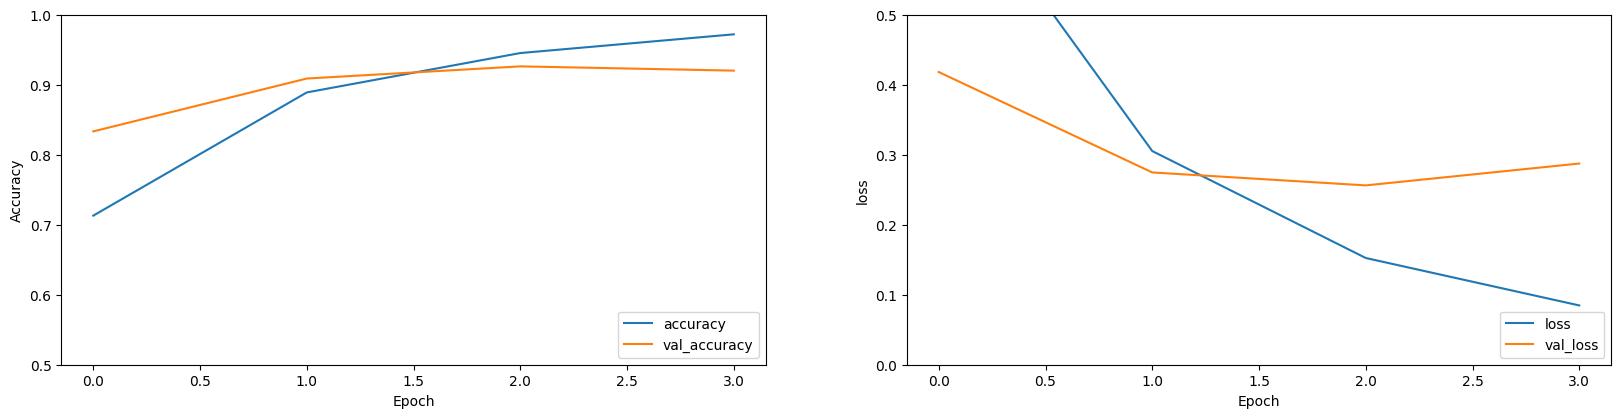

In [36]:
plt.subplot(221)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(222)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.0, .5])
plt.legend(loc='lower right')

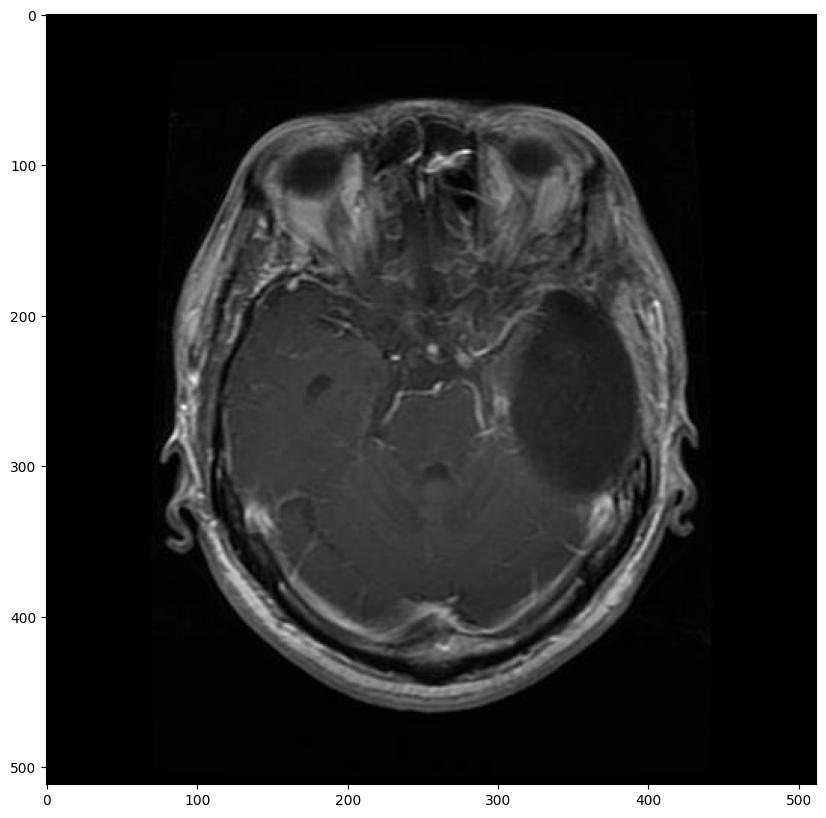

In [45]:
img_test=cv2.imread("Te-gl_0015.jpg")
plt.imshow(img_test)

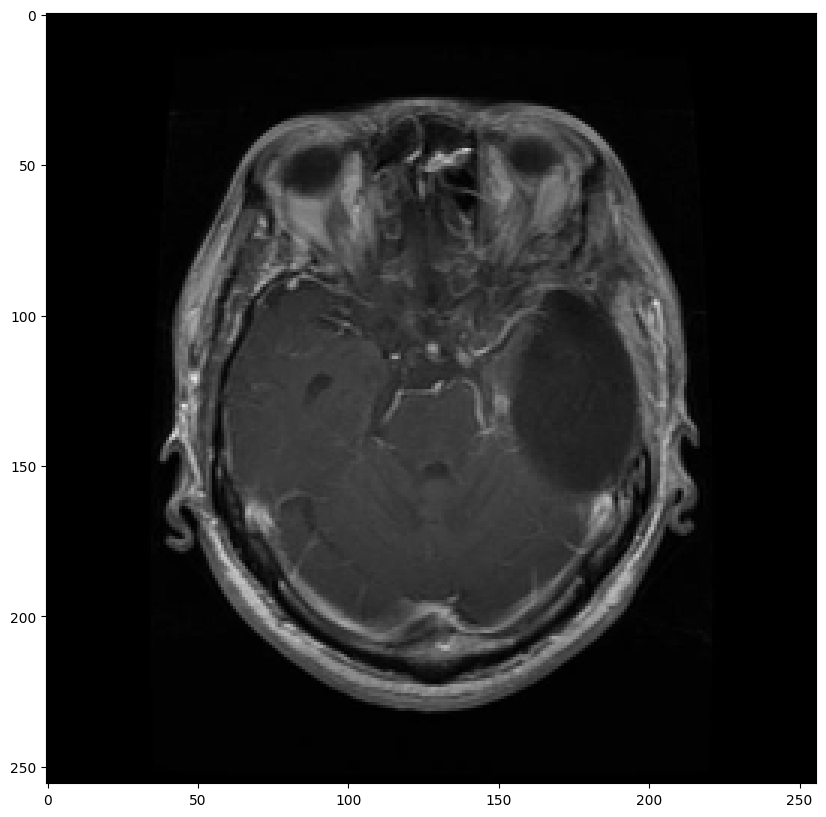

In [49]:
resize=tf.image.resize(img_test,(256,256))
plt.imshow(resize.numpy().astype(int))

In [51]:
model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 137ms/step


array([[0.9983215 , 0.7254071 , 0.00161389, 0.99711865]], dtype=float32)

In [ ]:
yhat_predi=model.predict(test)

In [38]:
yhat_predi

array([[0.9668465 , 0.9993152 , 0.00226713, 0.27682376],
       [0.03872106, 0.6101005 , 0.155053  , 0.99989367],
       [0.9966893 , 0.93299   , 0.03422692, 0.24798894],
       ...,
       [0.01159912, 0.8756613 , 0.19641851, 0.9995494 ],
       [0.00604847, 0.2960946 , 0.08219459, 0.9999998 ],
       [0.29302898, 0.99727803, 0.00207398, 0.99952036]], dtype=float32)

In [39]:
class_name=os.listdir(data_dir)
x=0
for i in yhat_predi[1]:
        print(class_name[x], i)
        x=x+1

glioma 0.038721062
meningioma 0.6101005
notumor 0.155053
pituitary 0.99989367


In [40]:
import pickle
with open ("ImageClassification_model.pkl","wb") as f:
    pickle.dump(model,f)